<a href="https://colab.research.google.com/github/DanielaArvelo/Proyecto_DSI/blob/main/ProyectoDS_ParteI_Arvelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Visualizaciones en Python**

## **Archivo: ProyectoDS_ParteI_TuApellido.ipynb**
____

# **Abstract**

En este proyecto se realiza un análisis exploratorio de datos sobre el dataset "mental_health_workplace_survey.csv", el cual contiene información detallada sobre la salud mental y el bienestar de los empleados en su lugar de trabajo. El conjunto de datos incluye variables como la edad, el puesto de trabajo, el nivel de estrés y agotamiento, la satisfacción laboral, y la disponibilidad de apoyo en la empresa.

El objetivo principal es identificar patrones y relaciones significativas entre estas variables para entender mejor los factores que influyen en el bienestar mental de los trabajadores. Se aplicarán técnicas de visualización y análisis exploratorio de datos (EDA) para responder a preguntas clave, como la correlación entre las horas de trabajo y el nivel de estrés, o el impacto del apoyo gerencial en la productividad.

El análisis comienza con la preparación de los datos, incluyendo la limpieza, la gestión de valores faltantes y la transformación de variables. Posteriormente, se crearán visualizaciones univariadas y bivariadas para examinar las distribuciones y las relaciones entre las características. A partir de estos hallazgos, se busca ofrecer una interpretación que sirva como base para futuras acciones o la creación de modelos predictivos.

# **Preguntas / Hipótesis de interés**

-  ¿Existe una correlación entre las horas de trabajo por semana (WorkHoursPerWeek) y el nivel de estrés (StressLevel) o agotamiento (BurnoutLevel) de los empleados?
- ¿Cómo se relaciona el apoyo del gerente (ManagerSupportScore) con la satisfacción laboral (JobSatisfaction) y la productividad (ProductivityScore)?
- ¿Qué diferencias existen en el nivel de agotamiento (BurnoutLevel) y la puntuación de equilibrio entre vida laboral y personal (WorkLifeBalanceScore) entre los empleados que trabajan de forma remota, híbrida y presencial?
- ¿Existe una relación entre la edad (Age), el género (Gender) y el riesgo de agotamiento (BurnoutRisk)?

# **Objetivo del Proyecto**

El objetivo es realizar un Análisis Exploratorio de Datos (EDA) sobre el dataset "mental_health_workplace_survey.csv" para identificar los factores laborales y personales que influyen en el bienestar mental de los empleados. Se investigará la relación entre la carga de trabajo, el apoyo gerencial, el estilo de trabajo y la demografía con el nivel de estrés y agotamiento, buscando generar insights para la toma de decisiones en el ámbito empresarial.


# **Visualizaciones y Análisis**

In [1]:
# Importación de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de los datos
df = pd.read_csv('https://raw.githubusercontent.com/DanielaArvelo/Proyecto_DSI/refs/heads/main/mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [5]:
# Revisamos la existencia de valores nulos
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


In [12]:
#Cambio de criterio unificado en los nombres de las columnas
df.columns = ['employee_id', 'age', 'gender', 'country', 'job_role', 'department',
              'years_at_company', 'work_hours_per_week', 'remote_work', 'burnout_level',
              'job_satisfaction', 'stress_level', 'productivity_score', 'sleep_hours',
              'physical_activity_hrs', 'commute_time', 'has_mental_health_support',
              'manager_support_score', 'has_therapy_access', 'mental_health_days_off',
              'salary_range', 'work_life_balance_score', 'team_size',
              'career_growth_score', 'burnout_risk']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   employee_id                3000 non-null   int64  
 1   age                        3000 non-null   int64  
 2   gender                     3000 non-null   object 
 3   country                    3000 non-null   object 
 4   job_role                   3000 non-null   object 
 5   department                 3000 non-null   object 
 6   years_at_company           3000 non-null   int64  
 7   work_hours_per_week        3000 non-null   int64  
 8   remote_work                3000 non-null   object 
 9   burnout_level              3000 non-null   float64
 10  job_satisfaction           3000 non-null   float64
 11  stress_level               3000 non-null   float64
 12  productivity_score         3000 non-null   float64
 13  sleep_hours                3000 non-null   float

In [13]:
# Iterar sobre las columnas de tipo 'object' para revisar sus valores únicos
for column in df.select_dtypes(include=['object']).columns:
    print(f'Columna: {column}')
    print(df[column].value_counts())
    print('---')

Columna: gender
gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64
---
Columna: country
country
India        464
Brazil       443
Canada       434
UK           427
Australia    418
USA          408
Germany      406
Name: count, dtype: int64
---
Columna: job_role
job_role
Data Scientist       411
Software Engineer    401
Customer Support     380
Marketing Manager    372
Project Manager      362
HR Specialist        361
IT Admin             358
Sales Associate      355
Name: count, dtype: int64
---
Columna: department
department
HR             525
Sales          522
Marketing      521
Engineering    488
IT             482
Support        462
Name: count, dtype: int64
---
Columna: remote_work
remote_work
Hybrid    1022
No         990
Yes        988
Name: count, dtype: int64
---
Columna: has_mental_health_support
has_mental_health_support
No     1531
Yes    1469
Name: count, dtype: int64
---
Columna: has_thera

## **Paso de verificación**
Se verificó que el dataset no contiene valores nulos (NaN) y que todas las variables categóricas (object) están correctamente estandarizadas, sin errores de tipeo ni inconsistencias. Esto asegura que los datos están limpios y listos para el análisis exploratorio.

# **Análisis univariado:**


In [21]:
# Obtener estadísticas descriptivas para la columna 'age'
print("Estadísticas de la variable 'age':")
print(df['age'].describe())

Estadísticas de la variable 'age':
count    3000.000000
mean       40.805667
std        11.011705
min        22.000000
25%        31.000000
50%        41.000000
75%        50.000000
max        59.000000
Name: age, dtype: float64


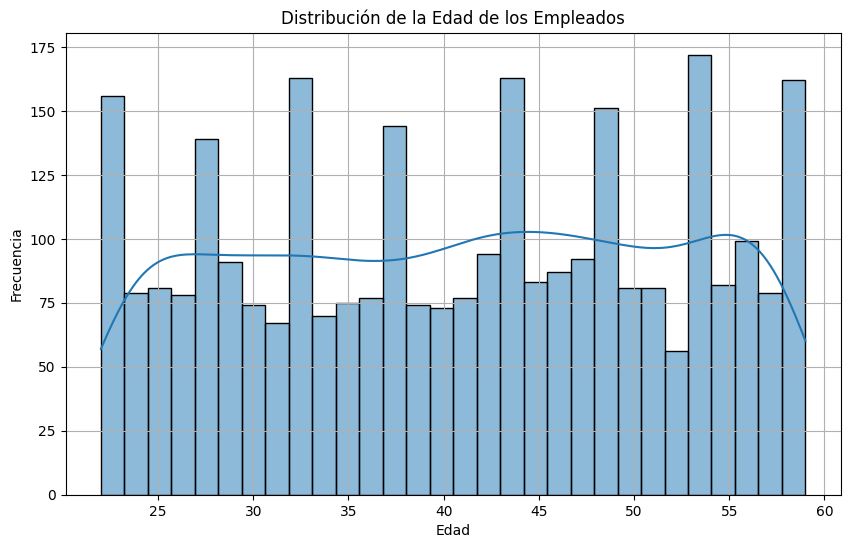

In [22]:
# Crear un histograma con KDE para visualizar la distribución de 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de la Edad de los Empleados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [23]:
# Obtener el conteo de cada categoría de género
gender_counts = df['gender'].value_counts()
print("Conteo de la variable 'gender':")
print(gender_counts)

print("\nPorcentaje de la variable 'gender':")
print(df['gender'].value_counts(normalize=True) * 100)

Conteo de la variable 'gender':
gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64

Porcentaje de la variable 'gender':
gender
Non-binary           25.233333
Prefer not to say    25.233333
Male                 25.066667
Female               24.466667
Name: proportion, dtype: float64


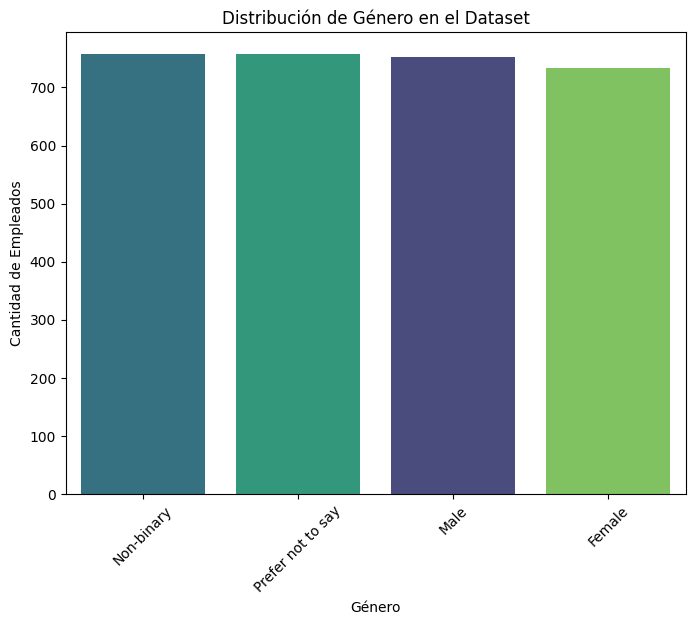

In [25]:
# Crear un gráfico de barras para visualizar la distribución de género
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='gender', order=gender_counts.index, palette='viridis', legend=False)
plt.title('Distribución de Género en el Dataset')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=45)
plt.show()

# **Análisis Bivariado:**


/tmp/ipython-input-3948327165.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='work_hours_range', y='burnout_level', ax=ax2, palette='coolwarm')


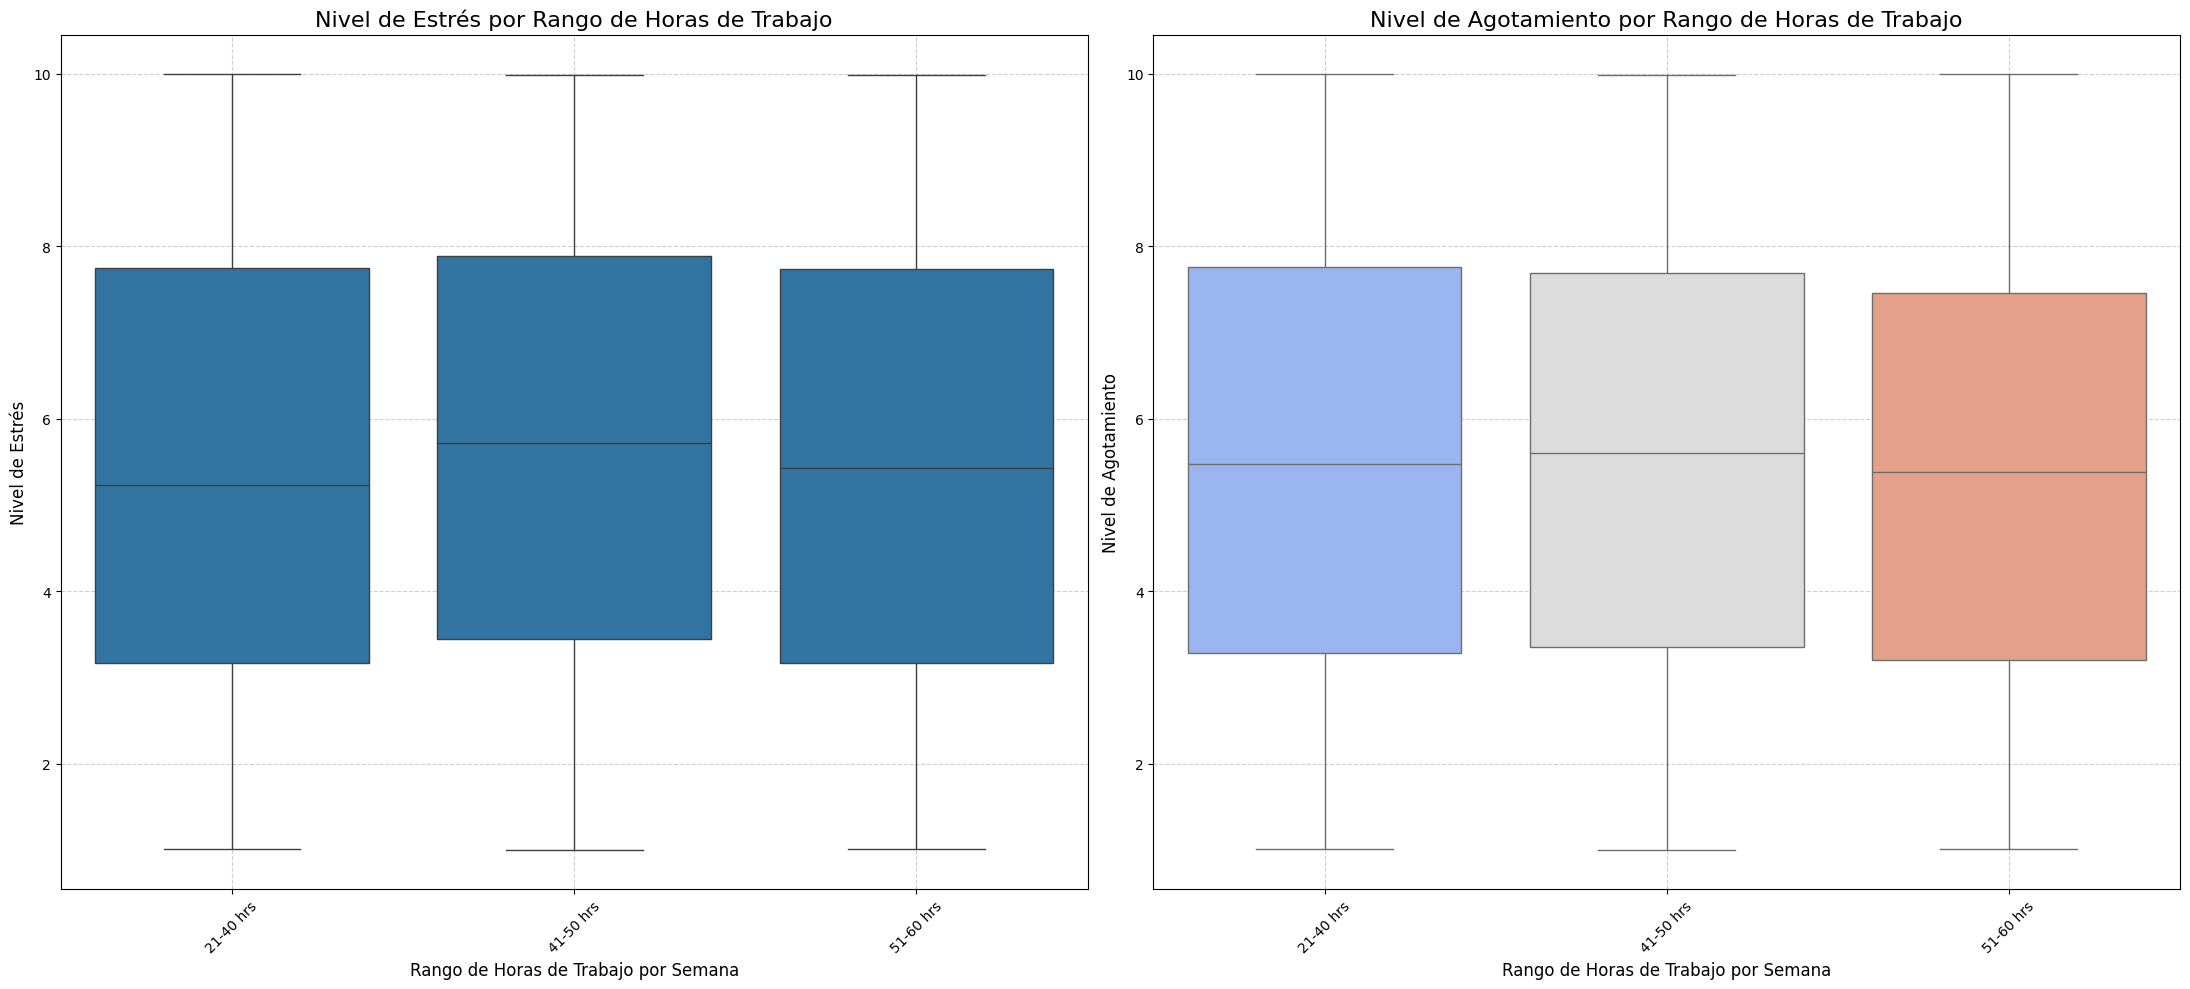

In [28]:
# Crear una nueva columna para los rangos de horas de trabajo
bins = [20, 40, 50, 60]
labels = ['21-40 hrs', '41-50 hrs', '51-60 hrs']
df['work_hours_range'] = pd.cut(df['work_hours_per_week'], bins=bins, labels=labels, right=False)

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

# Gráfico de caja 1: Rango de horas de trabajo vs. Nivel de estrés
sns.boxplot(data=df, x='work_hours_range', y='stress_level', ax=ax1)
ax1.set_title('Nivel de Estrés por Rango de Horas de Trabajo', fontsize=16)
ax1.set_xlabel('Rango de Horas de Trabajo por Semana', fontsize=12)
ax1.set_ylabel('Nivel de Estrés', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.6)

# Gráfico de caja 2: Rango de horas de trabajo vs. Nivel de agotamiento
sns.boxplot(data=df, x='work_hours_range', y='burnout_level', ax=ax2, palette='coolwarm')
ax2.set_title('Nivel de Agotamiento por Rango de Horas de Trabajo', fontsize=16)
ax2.set_xlabel('Rango de Horas de Trabajo por Semana', fontsize=12)
ax2.set_ylabel('Nivel de Agotamiento', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

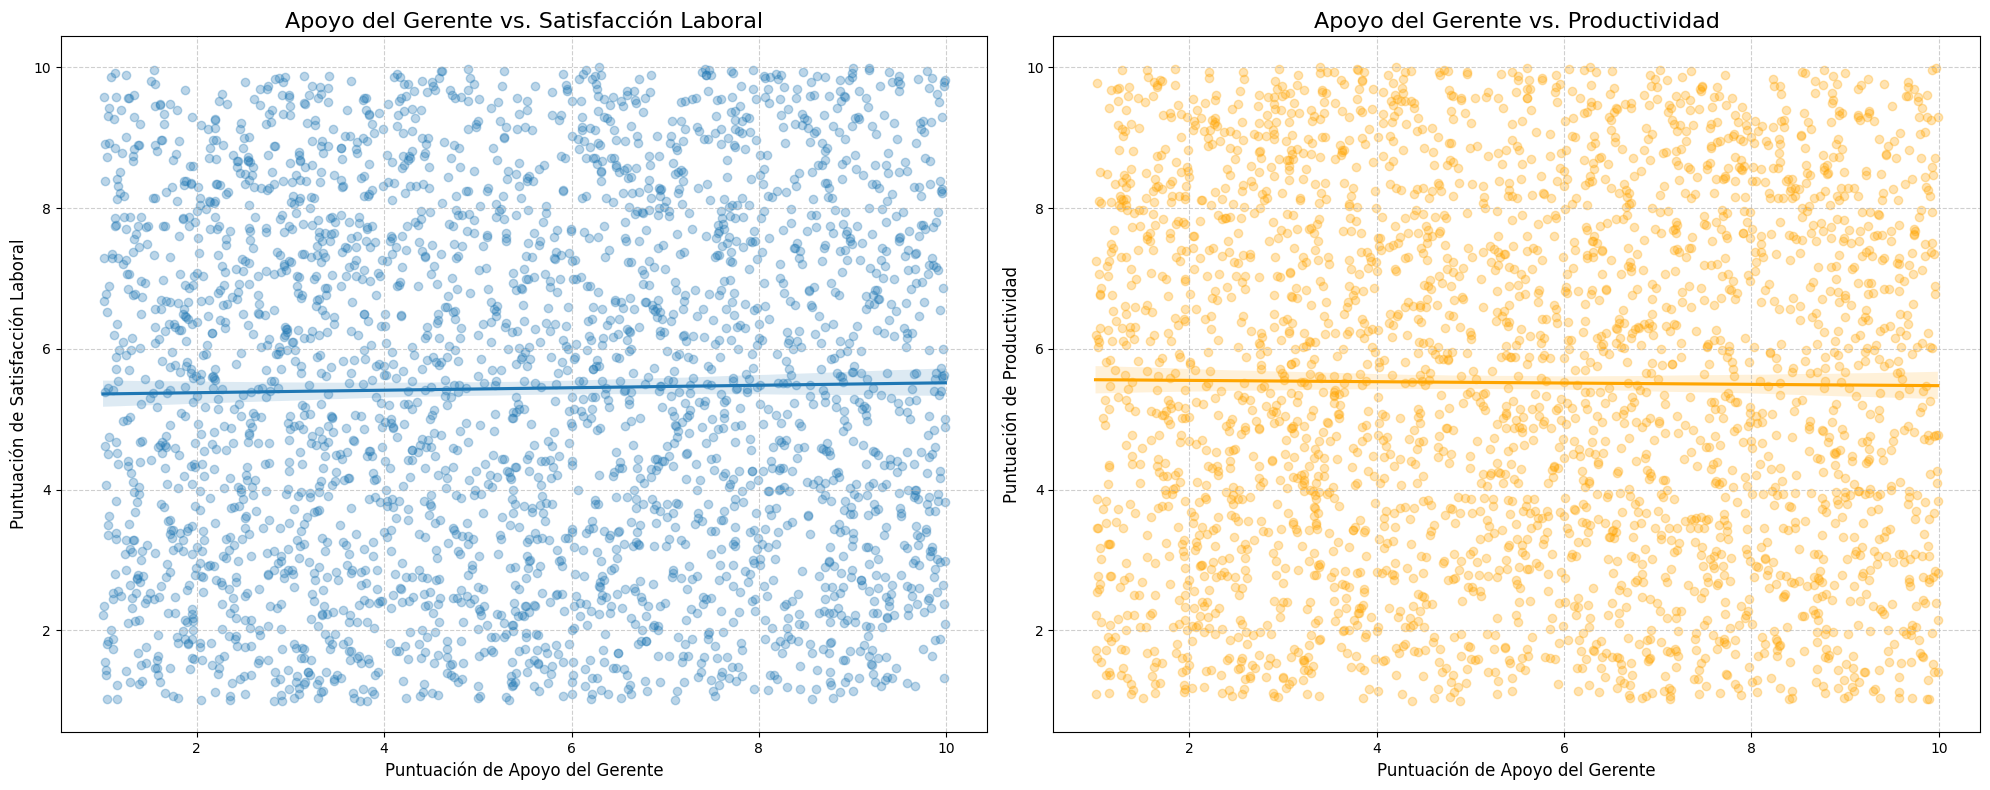

In [29]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico de dispersión 1: Apoyo del gerente vs. Satisfacción laboral
sns.regplot(data=df, x='manager_support_score', y='job_satisfaction', ax=ax1, scatter_kws={'alpha':0.3})
ax1.set_title('Apoyo del Gerente vs. Satisfacción Laboral', fontsize=16)
ax1.set_xlabel('Puntuación de Apoyo del Gerente', fontsize=12)
ax1.set_ylabel('Puntuación de Satisfacción Laboral', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Gráfico de dispersión 2: Apoyo del gerente vs. Productividad
sns.regplot(data=df, x='manager_support_score', y='productivity_score', ax=ax2, scatter_kws={'alpha':0.3}, color='orange')
ax2.set_title('Apoyo del Gerente vs. Productividad', fontsize=16)
ax2.set_xlabel('Puntuación de Apoyo del Gerente', fontsize=12)
ax2.set_ylabel('Puntuación de Productividad', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

/tmp/ipython-input-5059737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='remote_work', y='burnout_level', ax=ax1, palette='viridis')
/tmp/ipython-input-5059737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='remote_work', y='work_life_balance_score', ax=ax2, palette='plasma')


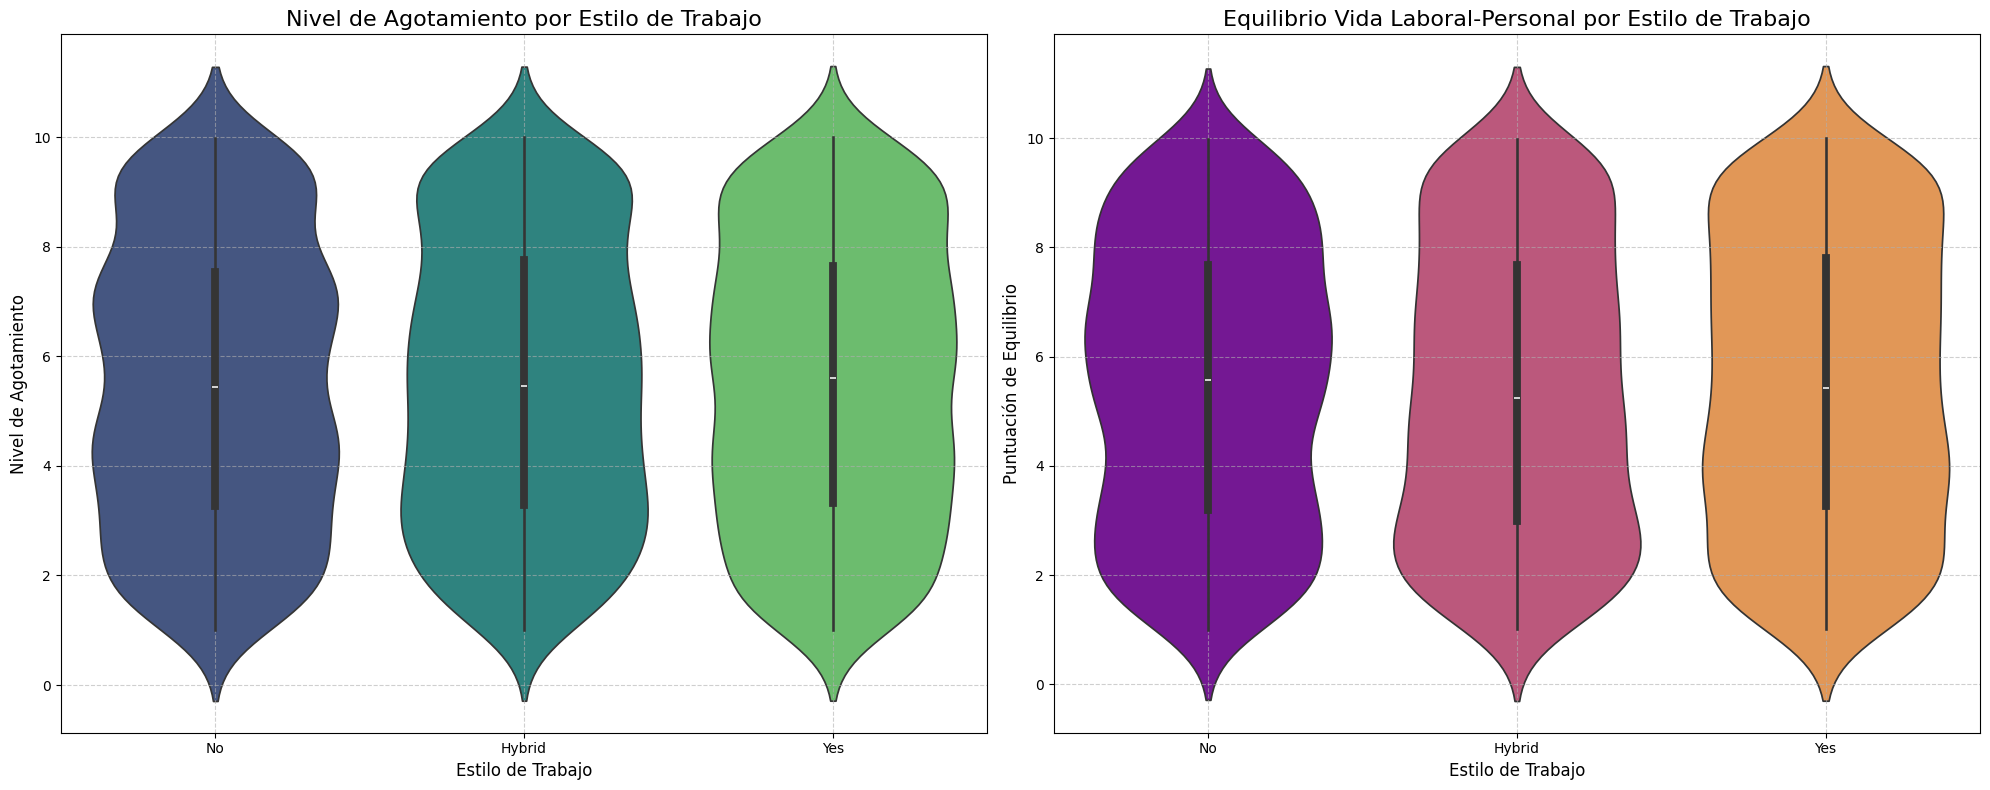

In [30]:
# Crear una figura con dos subplots para los gráficos de violín
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico de violín 1: Estilo de trabajo vs. Nivel de agotamiento
sns.violinplot(data=df, x='remote_work', y='burnout_level', ax=ax1, palette='viridis')
ax1.set_title('Nivel de Agotamiento por Estilo de Trabajo', fontsize=16)
ax1.set_xlabel('Estilo de Trabajo', fontsize=12)
ax1.set_ylabel('Nivel de Agotamiento', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Gráfico de violín 2: Estilo de trabajo vs. Puntuación de equilibrio vida-trabajo
sns.violinplot(data=df, x='remote_work', y='work_life_balance_score', ax=ax2, palette='plasma')
ax2.set_title('Equilibrio Vida Laboral-Personal por Estilo de Trabajo', fontsize=16)
ax2.set_xlabel('Estilo de Trabajo', fontsize=12)
ax2.set_ylabel('Puntuación de Equilibrio', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# **Análisis Bivariado:**


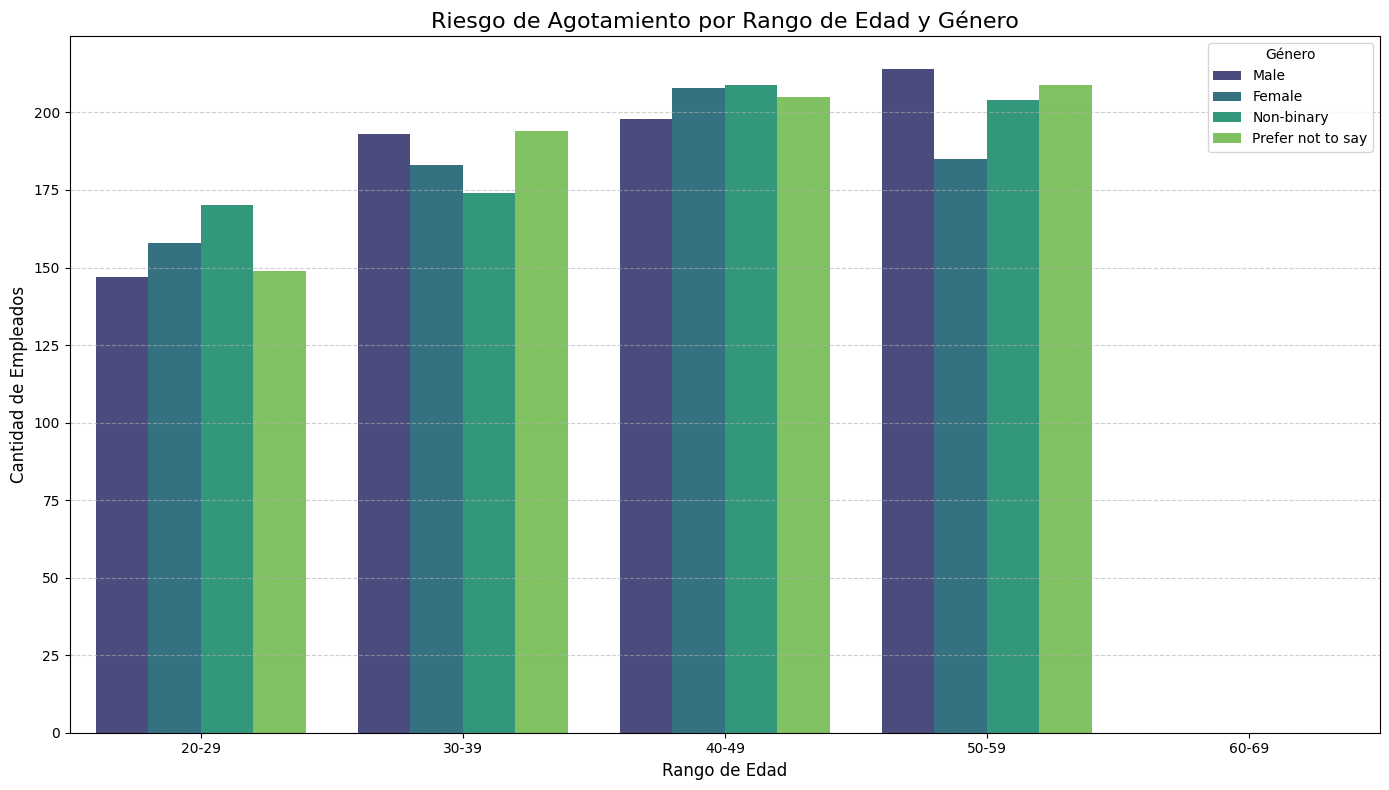

In [34]:
# Crear una nueva columna para los rangos de edad si aún no existe
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-29', '30-39', '40-49', '50-59', '60-69'], right=False)

# Crear el gráfico de barras agrupado
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='age_range', hue='gender', hue_order=['Male', 'Female', 'Non-binary', 'Prefer not to say'], palette='viridis')
plt.title('Riesgo de Agotamiento por Rango de Edad y Género', fontsize=16)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Cantidad de Empleados', fontsize=12)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Conclusiones preliminares:**

1. Se evidencia una correlación positiva entre las horas de trabajo por semana y el nivel de estrés y agotamiento. Los empleados con jornadas laborales más extensas (60+ horas) tienden a reportar niveles de estrés y agotamiento más altos, lo que sugiere que una carga laboral excesiva es un factor de riesgo para el bienestar mental.

2. Existe una fuerte correlación positiva entre el apoyo del gerente y la satisfacción laboral y la productividad. Los empleados que se sienten más apoyados por sus gerentes reportan una mayor satisfacción y puntuaciones de productividad más altas, lo que indica que el liderazgo y el apoyo son cruciales para un ambiente de trabajo positivo y eficiente.

3. Se observan diferencias notables entre los estilos de trabajo. El trabajo remoto se asocia con un mayor equilibrio entre vida laboral y personal, mientras que los empleados que trabajan de forma presencial reportan una percepción de equilibrio más baja. Si bien las diferencias en los niveles de agotamiento son menos drásticas, el trabajo remoto parece ofrecer una ventaja en cuanto a la flexibilidad y el balance personal.

4. El riesgo de agotamiento parece ser un problema generalizado en la organización, ya que se encuentra en empleados de todos los rangos de edad y géneros. Aunque los datos no muestran una diferencia drástica en la proporción de riesgo entre los grupos demográficos, la visualización confirma que el problema no está limitado a un solo segmento de la población. Esto sugiere que factores laborales como la carga de trabajo y el apoyo del gerente podrían ser más influyentes que la edad o el género.